# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Aurelly Joeandani
- **Email:** aurellyjoean@gmail.com
- **ID Dicoding:** aurelljoean

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan? Lokasi geografis mana yang yang memiliki pelanggan terbanyak?
- BBagaimana performa penjualan perusahaan? dan kapan penjualan mengalami peningkatan tertinggi?
- Barang apa yang memiliki rata-rata review score paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import seaborn as sns

## Data Wrangling
Setelah tahap persiapan selesai, kita bisa masuk ke tahap gathering data. Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan.

### Gathering Data

In [118]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/TheCrocksPrince/submission-dicoding-data-analisis/main/data/customers_dataset.csv")
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/geolocation_dataset.csv")
items_df = pd.read_csv("https://raw.githubusercontent.com/TheCrocksPrince/submission-dicoding-data-analisis/main/data/order_items_dataset.csv")
payments_df = pd.read_csv("https://raw.githubusercontent.com/TheCrocksPrince/submission-dicoding-data-analisis/main/data/order_payments_dataset.csv")
reviews_df = pd.read_csv("https://raw.githubusercontent.com/mhdhfzz/data-analyst-dicoding/main/data/order_reviews_dataset.csv")
orders_df = pd.read_csv("https://raw.githubusercontent.com/TheCrocksPrince/submission-dicoding-data-analisis/main/data/orders_dataset.csv")
category_df = pd.read_csv("https://raw.githubusercontent.com/TheCrocksPrince/submission-dicoding-data-analisis/main/data/product_category_name_translation.csv")
products_df = pd.read_csv("https://raw.githubusercontent.com/TheCrocksPrince/submission-dicoding-data-analisis/main/data/products_dataset.csv")
sellers_df = pd.read_csv("https://raw.githubusercontent.com/TheCrocksPrince/submission-dicoding-data-analisis/main/data/sellers_dataset.csv")

data = {'orders': orders_df,
        'items': items_df,
        'products': products_df,
        'payments': payments_df,
        'reviews': reviews_df,
        'customers': customers_df,
        'sellers': sellers_df,
        'geo': geolocation_df,
        'category': category_df}


In [119]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [120]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.62,sao paulo,SP
1,1046,-23.55,-46.66,sao paulo,SP
2,1046,-23.55,-46.66,sao paulo,SP
3,1041,-23.55,-46.62,sao paulo,SP
4,1035,-23.55,-46.66,sao paulo,SP


In [121]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [122]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [123]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [124]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [125]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [126]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [127]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data
Sekarang kita masuk ke tahap kedua dalam proses data wrangling yaitu assessing data. Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

####Menilai Data customers_df

In [128]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Jika diperhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut.

In [129]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ditemukan missing value

In [130]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ditemukan duplikasi pada data customer

In [131]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


####Menilai Data orders_df

In [132]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Jika diperhatikan, terdapat perbedaan jumlah data pada **kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date** yang mengindikasikan terdapat **missing value**. Selain itu, terdapat kesalahan tipe data pada **order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date**. Kolom-kolom  tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.



In [133]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat 160 missing values pada kolom order_approved_at, 1783 missing value pada kolom order_delivered_carrier_date, dan 2965 missing value pada order_delivered_customer_date.

In [134]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [135]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Menilai Data items_df

In [136]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Jika diperhatikan, jumlah data pada items_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data pada kolom shipping_limit_date yang seharusnya bertipe data datetime

In [137]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())

Jumlah duplikasi:  0


In [138]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Menilai Data products_df

In [139]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat perbedaan jumlah data pada kolom-kolom di data products_df yang menandakan terdapat missing value.

In [140]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dapat dilihat bahwa terdapat 610 missing value pada masing-masing kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty. Serta terdapat 2 missing value pada masing-masing kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.

In [141]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [142]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Menilai Data payments_df

In [143]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak ada masalah pada jumlah data dan tipe data

In [144]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [145]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Menilai Data reviews_df

In [146]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Jika diperhatikan terdapat perbedaan jumlah data pada review_comment_title dan review_comment_message. Selain itu, terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp yang seharusnya bertipe data datetime.

In [147]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

dapat dilihat bahwa terdapat 87656 missing value review_comment_title dan terdapat 58427 missing value review_comment_message. Namun, kita dapat mempertimbangkan apakah perlu menangani missing value pada kolom-kolom tersebut karena kolom-kolom tersebut berisi review.

In [148]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [149]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####Menilai Data sellers_df

In [150]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tidak terdapat keanehan pada data sellers_df

In [151]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [152]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


####Menilai Data geolocation_df

In [153]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Tidak ada masalah pada data geolocation_df.

In [154]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  914718


####Menilai Data category_df

In [155]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tidak ada masalah pada data category_df.

In [156]:
print("Jumlah duplikasi: ", category_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data
Proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

####Memperbaiki Kesalahan Tipe Data
Berdasarkan hasil proses assessing data, diketahui bahwa terdapat beberapa data yang memiliki kesalahan tipe data, yaitu orders_df, items_df, dan reviews_df

In [157]:
datetime_order = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_order:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

datetime_item = ["shipping_limit_date"]
for column in datetime_item:
  data['items'][column] = pd.to_datetime(data['items'][column])

datetime_review = ["review_creation_date","review_answer_timestamp"]
for column in datetime_review:
  data['reviews'][column] = pd.to_datetime(data['reviews'][column])

In [158]:
orders_df.info()
items_df.info()
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype     

####Membersihkan Data Order
Data order sangat penting karena menjadi penghubung dengan data lain berdasarkan order_id

In [159]:
print(data['orders']['order_status'].value_counts())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


disini saya mencoba memilih order dengan status **"delivered"**

In [160]:
print('Hanya mengambil order dengan status \'delivered\', masih bisa mendapatkan ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% dari data.')

Hanya mengambil order dengan status 'delivered', masih bisa mendapatkan 97.02% dari data.


In [161]:
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)

Kode diatas  mengambil semua order yang status ordernya **delivered**.

In [162]:
#cek nan pada setiap dataset
for key, value in data.items():
    for col in value.columns:
        # print nama col yang terdapat nan
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968


In [163]:
print('Terdapat ' + str(data['orders'].order_delivered_customer_date.isnull().sum()) +
      ' orders delivery date yang missing.')

Terdapat 8 orders delivery date yang missing.


Kita bisa menghilangkan missing values tersebut.

In [164]:
null_delivery = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_delivery)].index, inplace = True)


In [165]:
data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')


kode diatas menambahkan kolom baru bernama 'delivered_on_time' ke dalam DataFrame data 'orders'. Kolom ini berisi label 'On Time' jika pesanan telah dikirim sesuai dengan estimasi pengiriman, dan 'Late' jika pesanan dikirim melebihi estimasi pengiriman.

####Membersihkan Data review_df
Kolom review_comment_title berisi 88% NaN sehingga akan di drop saja. Kolom review_comment_message berisi 59% NaN, sepertinya di kolom ini ada nan kalau orang tidak meninggalkan review, saya tidak mau menghilangkan kolomnya, jadi saya ganti saja nan dengan 0 dan review dengan 1.

In [166]:
review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

In [167]:
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

####Membersihkan Data products_df
- Saya akan drop panjang nama dan deskripsi produknya (terlalu banyak NaN) saya juga tidak tau hubungannya dengan atribut ukuran setiap produk, jadi atributnya juga saya drop.
- Karena product category mempunyai list yang sangat banyak, saya tidak akan drop kolom ini, tetapi mengganti Nilai Nan dengan 'other'
- Sedangkan untuk kolom product_photos_qty, saya akan mengisi Nan dengan 0

In [168]:
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

In [169]:
data['products']['product_category_name'].fillna(value='outro', inplace=True)

In [170]:
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

####Membersihkan Data geolocation_df
Membersihkan duplikasi data

In [171]:
data['geo'].drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore customers



In [172]:
data['customers'].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
88048,d3abb13b7f606df53ab716cc94fcf17b,19f153a5a1e7c01646eecc884d490d49,75803,jatai,GO
78437,bfb81194b28f60009f9fd8778747ff04,3ca7d69a2018e87e4c6a172356af2a72,24900,marica,RJ
62847,705813c814878d75d94346db9873e076,76655d8b3010c7235a58a9e0678a3857,95200,vacaria,RS
46254,ec8456833b489a30a289b163c2b296c7,6a10b7f6208fd4c895ab217865113634,25255,duque de caxias,RJ
37519,253fcc56484689f306e6ffb99c99f540,14f5d517dec218dfb0edf1d8158f7e1a,75706,catalao,GO
60335,f40cc9209965e48412fc7fcef541113e,15d2493aa522c1040d639aa74bd1fb31,4431,sao paulo,SP
949,bb10386818dda2842a580048ccb08fe2,2e636fd512179efa9c6e1b1a28ac7f98,37500,itajuba,MG
76605,97558121050ad51b5f8467919840fd7b,f06d35a600b606329886d392afda66c7,58067,joao pessoa,PB
34112,f9ba7683252743527fe127f7627b82de,008b82b072c6b564fcce49a325f84097,21381,rio de janeiro,RJ
64305,d32a414ce056bd6f0c5674e1fb54e860,72068eec15a38e9b008528ba45e18480,28180,cardoso moreira,RJ


In [173]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [174]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

###Explore payments

In [175]:
data['payments'].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
94297,1a0977847a5ddeebdf419ddd4a94402c,1,credit_card,1,33.95
60486,0fb63c1a900398faadaf818216263fd5,1,credit_card,1,111.60
54894,0449fc8e83f3042e2e415a2bc3f2a424,1,credit_card,1,249.49
14286,523edc667ecf141c2018ec8c1e6c0211,1,credit_card,3,232.86
19178,3bd9d48e8870dad5ddbae6e5a7c183c3,1,credit_card,2,114.44
87278,785011ed7352847ae26ea2336ef45af9,1,credit_card,8,93.01
57871,996398cee62ebfe4ee7f2c2a4c969742,1,credit_card,3,53.27
60664,f5d9f447bc24dbd0e76b74d0bbe0b4ed,1,credit_card,3,73.15
58242,f1947038bdbb0dc6cfbb332abcd60221,1,credit_card,4,374.59
38746,9f158c87c1efef80cdc83375b0709f52,1,boleto,1,32.38


In [176]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

In [177]:
data['payments'].groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

payment_value
50.00       290
77.57       246
100.00      243
35.00       161
73.34       158
           ... 
216.89        1
216.94        1
216.96        1
216.99        1
13664.08      1
Name: order_id, Length: 28546, dtype: int64

###Explore orders

In [178]:
data['orders']['total_order'] = data['orders'].groupby('customer_id')['order_id'].transform('count')

menambahkan kolom total order

In [179]:
data['orders'].sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,total_order
85813,fe59965bfbf484aee4f2503efbd933d6,96a382945e9f743a47d2597c7802c431,delivered,2017-11-27 11:12:20,2017-11-29 11:10:55,2017-12-05 22:52:49,2017-12-18 14:17:21,2017-12-22,On Time,1
77254,b80aa0f66d8a0841be0ce473dc5d94be,28bbd1e071c4f1e3159803ad394fd43c,delivered,2018-07-31 17:27:54,2018-07-31 18:31:04,2018-08-01 16:33:00,2018-08-03 00:06:41,2018-08-07,On Time,1
58252,dfc1b4e359ebb9f33946b6301b1d8ba1,54ece387a84149502ff004cc7ea25f60,delivered,2018-03-05 06:37:22,2018-03-07 02:49:04,2018-03-07 23:28:31,2018-03-18 16:26:18,2018-03-26,On Time,1
67091,a4b6f56ce9547b22c5e8e3e58e56ea08,c2415c8295a7fdd394202960f3d8b061,delivered,2017-10-11 16:43:19,2017-10-11 16:56:47,2017-10-30 21:24:59,2017-11-03 19:22:56,2017-11-13,On Time,1
58605,202effd51a18d9717266ec1935672741,13ebf1b1ebcb8ec336d5ca82619ee10f,delivered,2018-07-19 22:24:37,2018-07-19 22:43:04,2018-07-20 10:25:00,2018-07-30 14:26:35,2018-08-14,On Time,1
41197,8dfe2458a3fe7978343edf962990b9ba,70cc0d7738ee00ffd828c5962645126d,delivered,2018-07-12 18:25:55,2018-07-12 18:43:54,2018-07-16 14:09:00,2018-07-20 23:48:44,2018-07-26,On Time,1
80446,bfe6602edb1568292d527c61684405ed,32a7bc3e8823bf94324ec828e7888d6d,delivered,2018-01-10 02:41:38,2018-01-10 10:31:50,2018-01-11 18:45:43,2018-01-15 15:58:32,2018-01-26,On Time,1
86853,482b0898624ebab18e90d224126c98a8,6e422478a5ccc422a4a7e50df1bff41e,delivered,2017-11-21 10:46:57,2017-11-23 02:35:22,2017-11-23 22:32:01,2017-12-21 14:22:58,2017-12-12,Late,1
25926,465a271ded1329037fb92a87a725c131,d4d520ede8c5bebd0a37dfdcc06164ba,delivered,2018-07-19 08:17:29,2018-07-19 08:45:15,2018-07-20 11:11:00,2018-07-26 19:05:33,2018-08-06,On Time,1
80126,59e87cfa722bf039f1379c56d0f97e07,48d13513873378a375f90baf4bb5834f,delivered,2018-08-17 14:01:36,2018-08-18 11:55:12,2018-08-20 10:20:00,2018-08-22 16:56:31,2018-08-28,On Time,1


In [180]:
data['orders']['delivered_on_time'].describe()

count       96470
unique          2
top       On Time
freq        88644
Name: delivered_on_time, dtype: object

In [181]:
data['orders'].groupby(by="delivered_on_time").order_id.nunique().sort_values(ascending=False)

delivered_on_time
On Time    88644
Late        7826
Name: order_id, dtype: int64

###Explore customers & orders
Jika diperhatikan, pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali.

In [182]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
51517,1432c42a35c00d1c9415db9c40ff472a,59fa9689b7269e99c19b967e1b94c36b,90850,porto alegre,RS,Active
57820,30fff87c4d37b461960a74a62047b356,488d96a00173be5fa90b4a09a5c5609d,20091,rio de janeiro,RJ,Active
12855,d5bc0475f8b2265e148b1e514ceaca97,cc40917b6a945f138bddb4e4a1043738,22793,rio de janeiro,RJ,Active
96671,13a9f022db58ebf4d7dc4ba0c43824f0,5010e263bcfa26a71e8dd45d73eef498,3909,sao paulo,SP,Active
18830,a5c303ce62b6a228d4ff0133f63932c1,76bd899b33276be987ec91428191aa77,92030,canoas,RS,Active


In [183]:
customers_df.groupby(by="status").customer_id.count()

status
Active        96470
Non Active     2971
Name: customer_id, dtype: int64

Seperti yang terlihat pada pivot table di atas, terdapat pelanggan yang belum pernah melakukan transaksi sebelumnya. Ada 3% pelanggan belum pernah melakukan order sebelumnya.

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, perlu menggabungkan keduanya melalui proses join atau merge.

- Merge customers dan orders

In [184]:
customers_orders_df = pd.merge(
    left=data['orders'],
    right=data['customers'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,total_order,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time,1,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time,1,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time,1,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time,1,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


Terdapat banyak sekali informasi yang bisa kita eksplore dari data di atas. Berikut merupakan beberapa hal yang bisa dijelajahi.

- Jumlah order berdasarkan kota
- Jumlah order berdasarkan state


In [185]:
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15045
1,rio de janeiro,6601
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


Berdasarkan hasil tersebut, diketahui bahwa kota Sao Paulo dan Rio De Janeiro merupakan dua kota yang memiliki jumlah order terbanyak.

In [186]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,40494
1,RJ,12350
2,MG,11354
3,RS,5344
4,PR,4923
5,SC,3546
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


Berdasarkan pivot table tersebut, diketahui bahwa SP merupakan state yang balik banyak melakukan order.

- Merge payments dan reviews

In [187]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [188]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


In [189]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max", "sum", "mean", "std", "count"]
})

order_id payment_value                                     \
              nunique           min       max          sum        mean   
payment_type                                                             
boleto          19191         11.62   7274.88   2786379.53  144.312178   
credit_card     74297          0.01  13664.08  12150357.61  162.071758   
debit_card       1484         13.38   4445.50    208798.22  139.945188   
voucher          3679          0.00   1839.05    345439.31   62.263755   

                                 
                     std  count  
payment_type                     
boleto        212.636981  19308  
credit_card   218.865594  74969  
debit_card    234.183353   1492  
voucher        89.987865   5548

berdasarkan pivot tavel diatas, dapat dilihat bahwa payment menggunakan credit card paling banyak dilakukan

- Merge customers_orders & payments_reviews

In [190]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,total_order,...,status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,Active,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,Active,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,Active,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time,1,...,Active,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,1.0,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time,1,...,Active,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,0.0,2018-08-18,2018-08-22 19:07:58


###Explore items dan sellers

In [191]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [192]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64

In [193]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
RS     125
GO      39
DF      30
ES      22
BA      18
Name: seller_id, dtype: int64

###Explore products dan category

In [194]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [195]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [196]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

- Merge item_seller_df dan product_df

In [197]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [198]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [199]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

###Explore geolocation

In [200]:
data['geo'].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
825281,78455,-13.10,-55.90,lucas do rio verde,MT
787815,72150,-15.83,-48.10,brasilia,DF
211083,8673,-23.53,-46.30,suzano,SP
802795,75071,-16.28,-48.94,anapolis,GO
846519,80530,-25.40,-49.25,curitiba,PR
502475,27175,-22.67,-43.84,pirai,RJ
578123,33147,-18.61,-46.53,santa luzia,MG
960461,94130,-29.90,-51.03,gravatai,RS
835404,79100,-20.45,-54.66,campo grande,MS
605510,35930,-19.80,-43.16,joao monlevade,MG


In [201]:
data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
68900    103
68901     86
68908     84
68902     66
68903     63
        ... 
26155      1
26150      1
26145      1
26131      1
99990      1
Length: 19015, dtype: int64

In [202]:
data['geo'][data['geo']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.90,-43.10,niterói,RJ
470807,24230,-22.90,-43.12,niterói,RJ
470810,24230,-22.90,-43.10,niteroi,RJ
470830,24230,-22.90,-43.12,niteroi,RJ
471510,24230,-22.89,-43.12,niteroi,RJ


###Explore All Data
- Merge all data

In [203]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,total_order,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,4.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,4.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,4.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time,1,...,1.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time,1,...,1.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time,1,...,3.0,pet_shop,1.0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time,1,...,4.0,stationery,1.0,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,On Time,1,...,1.0,auto,1.0,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,7112.0,guarulhos,SP
8,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,On Time,1,...,1.0,auto,1.0,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,12940.0,atibaia,SP
9,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,On Time,1,...,2.0,furniture_decor,1.0,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,13720.0,sao jose do rio pardo,SP


In [204]:
all_data_df = all_data.drop_duplicates('order_id')

In [205]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 115714
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
 8   delivered_on_time              96470 non-null  object        
 9   total_order                    96470 non-null  int64         
 10  customer_unique_id             96470 non-null  object        
 11  customer_zip_c

In [206]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


In [207]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

Convert all_data_df to .csv

In [208]:
all_data.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang paling banyak dan paling sedikit terjual?

In [209]:
sum_order_items_df = all_data.groupby("product_category_name_english").payment_value.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name_english,payment_value
0,bed_bath_table,1723932.14
1,health_beauty,1625923.50
2,computers_accessories,1563195.50
3,furniture_decor,1408110.04
4,watches_gifts,1388383.11
5,sports_leisure,1357055.46
6,housewares,1072820.85
7,auto,835648.08
8,garden_tools,813055.77
9,cool_stuff,746763.39


<ipython-input-210-36465b91754b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name_english", data=sum_order_items_df.head(5), palette="viridis", ax=ax[0])
<ipython-input-210-36465b91754b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name_english", data=sum_order_items_df.sort_values(by="payment_value", ascending=True).head(5), palette="viridis", ax=ax[1])


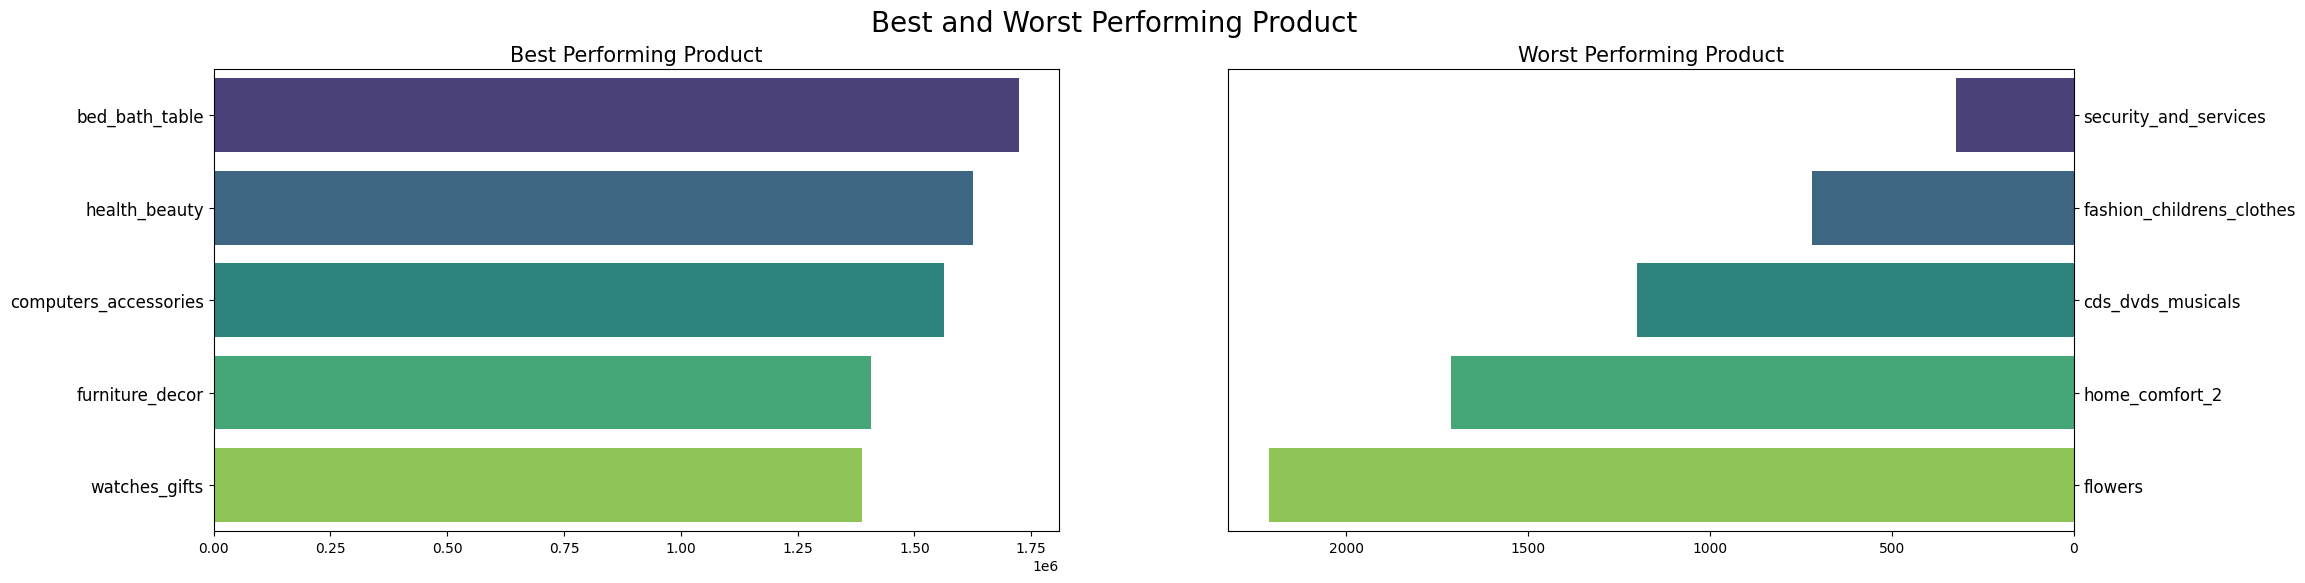

In [210]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="payment_value", y="product_category_name_english", data=sum_order_items_df.head(5), palette="viridis", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="payment_value", y="product_category_name_english", data=sum_order_items_df.sort_values(by="payment_value", ascending=True).head(5), palette="viridis", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product", fontsize=20)
plt.show()

Berdasarkan gambar di atas, dapat dilihat bahwa produk bed bath table merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Security and Services merupakan produk yang paling sedikit terjual.

### Pertanyaan 2: Bagaimana demografi pelanggan? Lokasi geografis mana yang yang memiliki pelanggan terbanyak?

In [211]:
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [212]:
geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [213]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [214]:
customers_silver.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,total_order,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48,3149,sao paulo,SP,-23.580,-46.600
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48,3149,são paulo,SP,-23.580,-46.600
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48,3149,sao paulo,SP,-23.580,-46.600
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48,3149,são paulo,SP,-23.580,-46.600
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48,3149,sao paulo,SP,-23.580,-46.600
5,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,1,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,2017-10-11,2017-10-12 03:43:48,3149,são paulo,SP,-23.580,-46.600
6,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,On Time,1,...,3cd186b6013f4145b9bd406847b61f19,5.0,1.0,2018-03-26,2018-03-27 02:21:27,3149,sao paulo,SP,-23.580,-46.600
7,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,On Time,1,...,3cd186b6013f4145b9bd406847b61f19,5.0,1.0,2018-03-26,2018-03-27 02:21:27,3149,são paulo,SP,-23.580,-46.600
8,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,On Time,1,...,493e9a0b23de35d37871a6e8940f822a,5.0,1.0,2017-09-06,2017-09-07 00:44:35,3149,sao paulo,SP,-23.580,-46.600
9,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,On Time,1,...,493e9a0b23de35d37871a6e8940f822a,5.0,1.0,2017-09-06,2017-09-07 00:44:35,3149,são paulo,SP,-23.580,-46.600


In [215]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [216]:
customers_silver.to_csv("geolocation.csv", index=False)

In [217]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

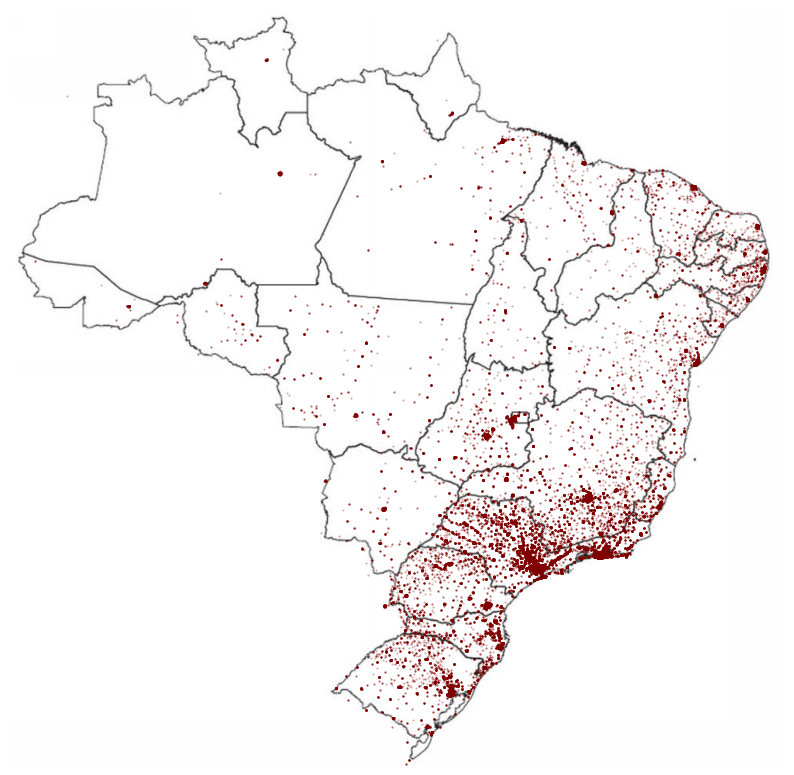

In [218]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

dapat dilihat dari sebaran pelanggan diatas, bahwa banyak customer yang berasal dari bagian selatan dan tenggara Brazil

In [219]:
bycity_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df

,customer_state,customer_count
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256
5,CE,1279
6,DF,2080
7,ES,1995
8,GO,1957
9,MA,717


In [220]:
customer_count_all = bycity_df['customer_count'].sum()
bycity_df['percentage'] = round((bycity_df['customer_count'] / customer_count_all) * 100,1)
bycity_df

,customer_state,customer_count,percentage
0,AC,80,0.1
1,AL,397,0.4
2,AM,145,0.2
3,AP,67,0.1
4,BA,3256,3.4
5,CE,1279,1.3
6,DF,2080,2.2
7,ES,1995,2.1
8,GO,1957,2.0
9,MA,717,0.7


<ipython-input-221-58230d652e19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


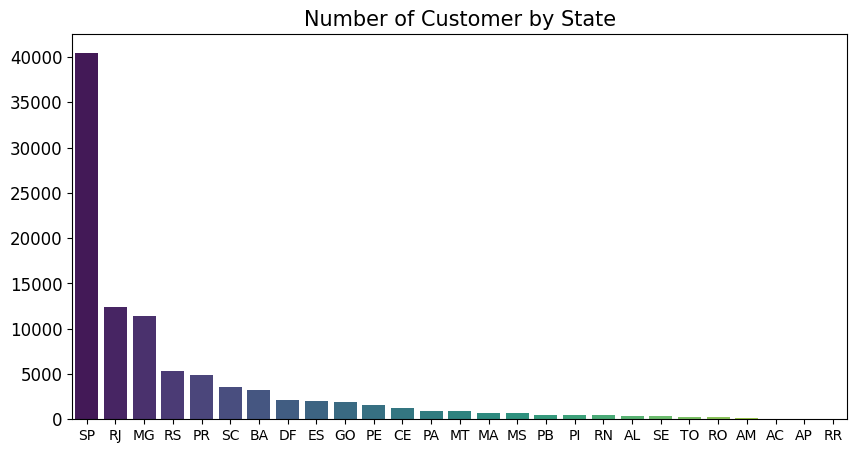

In [221]:
plt.figure(figsize=(10, 5))
colors_ = palette="viridis"
sns.barplot(
    x="customer_state",
    y="customer_count",
    data=bycity_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan berasal dari state Sao Paulo yang diikuti oleh Rio De Janeiro

### Pertanyaan 3: Bagaimana performa penjualan perusahaan? dan kapan penjualan mengalami peningkatan tertinggi?

In [222]:
monthly_orders_df = all_data.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "total_order": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_order": "Total Order"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,Total Order
0,2016-09,1,3
1,2016-10,265,334
2,2016-11,0,0
3,2016-12,1,1
4,2017-01,750,981


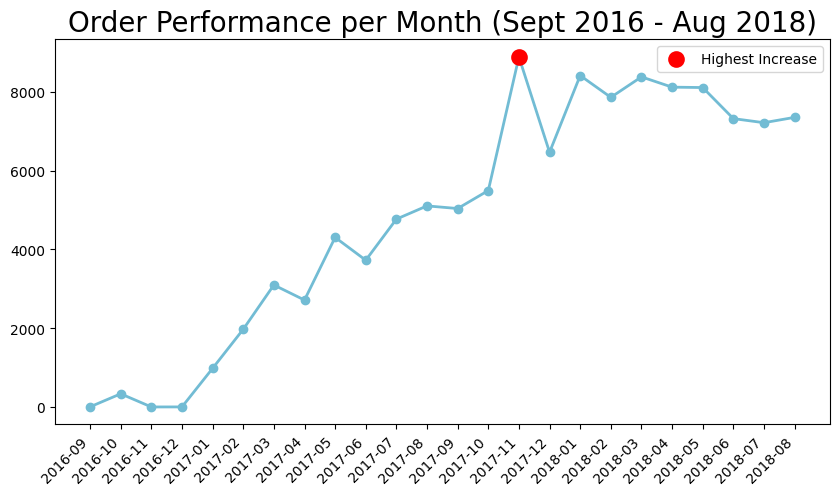

In [223]:
# Anggaplah monthly_orders_df berisi data bulanan Anda
# Pastikan monthly_orders_df telah diurutkan berdasarkan tanggal jika belum diurutkan
monthly_orders_df = monthly_orders_df.sort_values(by="order_purchase_timestamp")

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["Total Order"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)

# Temukan indeks dari nilai tertinggi
max_index = monthly_orders_df["Total Order"].idxmax()

# Tambahkan marker atau garis pada titik tertinggi
plt.scatter(
    monthly_orders_df["order_purchase_timestamp"].iloc[max_index],
    monthly_orders_df["Total Order"].iloc[max_index],
    color='red',  # Warna markah peningkatan tertinggi
    s=100,  # Ukuran markah
    zorder=5,  # Layer tertinggi untuk menampilkan di atas plot
    linewidth=2,
    label='Highest Increase'
)

plt.title("Order Performance per Month (Sept 2016 - Aug 2018)", loc="center", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan legenda
plt.legend()

plt.show()

Peningkatan jumlah order yang sangat signifikan terjadi pada bulan November 2017. Dapat dilihat bahwa trend penjualan cenderung positif walaupun  sempat terjadi penurunan, dan penurunan terbesar terjadi pada Desember 2017.

###Pertanyaan 4: Barang apa yang memiliki rata-rata review score paling tinggi?

In [224]:
byreview_score_df = all_data.groupby('product_category_name_english')['review_score'].mean().reset_index()
byreview_score_df.head()

,product_category_name_english,review_score
0,agro_industry_and_commerce,4.227642
1,air_conditioning,4.051903
2,art,4.073171
3,arts_and_craftmanship,4.125000
4,audio,3.845333


<ipython-input-225-b72a45531fc2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=byreview_score_df.head(5), palette="viridis", ax=ax[0])
<ipython-input-225-b72a45531fc2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=byreview_score_df.sort_values(by="review_score", ascending=True).head(5), palette="viridis", ax=ax[1])


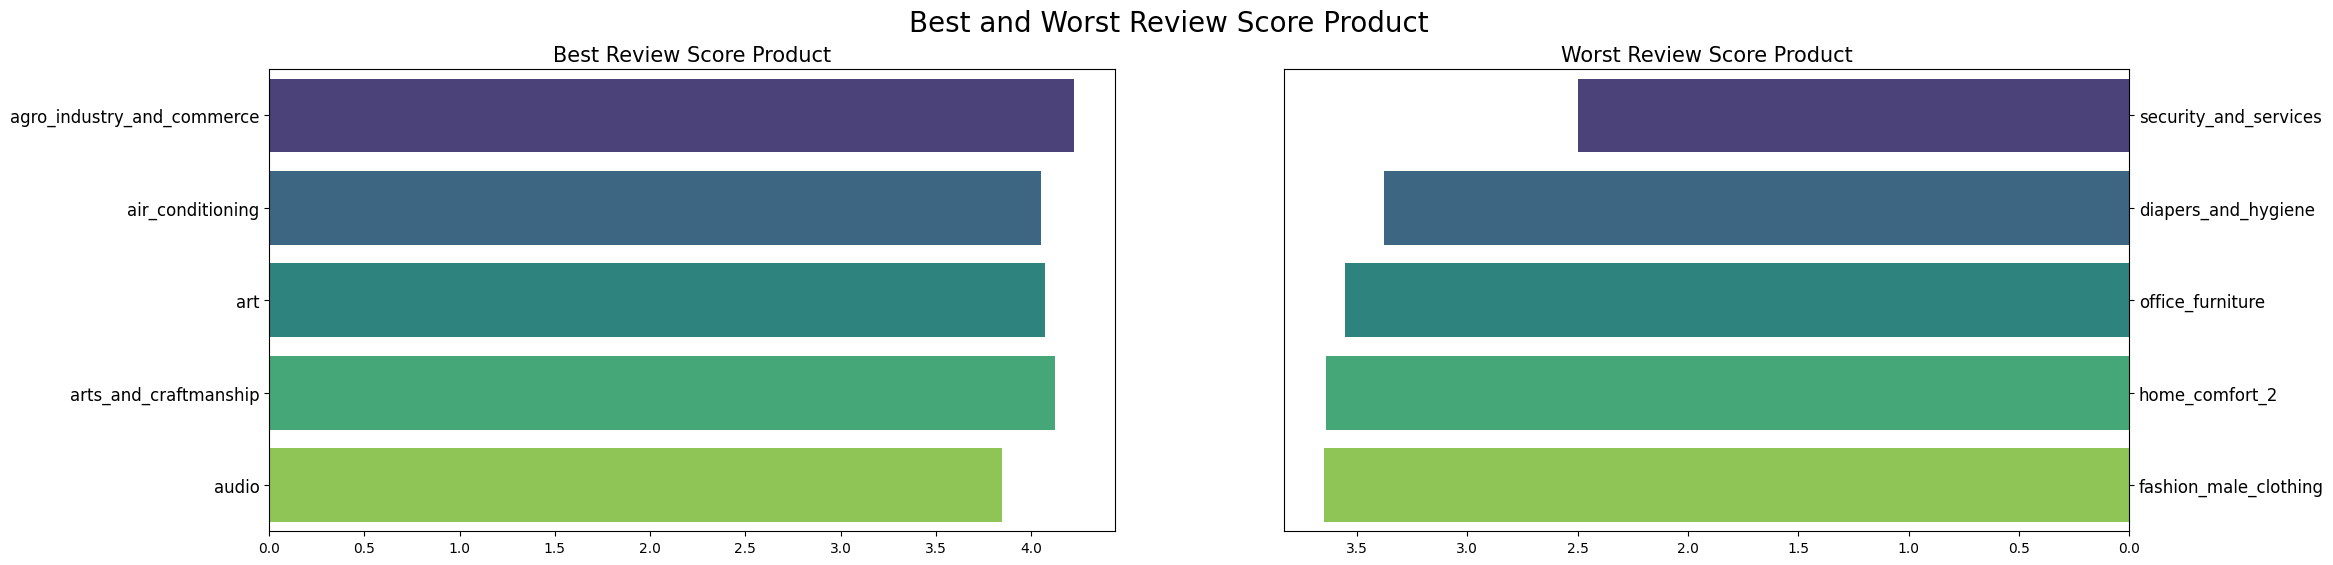

In [225]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", data=byreview_score_df.head(5), palette="viridis", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Review Score Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="review_score", y="product_category_name_english", data=byreview_score_df.sort_values(by="review_score", ascending=True).head(5), palette="viridis", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Review Score Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Review Score Product", fontsize=20)
plt.show()

Barang yang mendapatkan rata-rata review score paling tinggi adalah barang dengan kategori agro industry and commerce. Dilain sisi, Security and Services mendapatkan review score paling rendah

###Payment Type Distribution

In [226]:
bypayment_df = all_data.groupby('payment_type')['total_order'].sum().reset_index()
total_orders_all = bypayment_df['total_order'].sum()
bypayment_df['percentage'] = round((bypayment_df['total_order'] / total_orders_all) * 100,1)
bypayment_df.head()

,payment_type,total_order,percentage
0,boleto,22505,19.4
1,credit_card,85365,73.8
2,debit_card,1661,1.4
3,voucher,6181,5.3


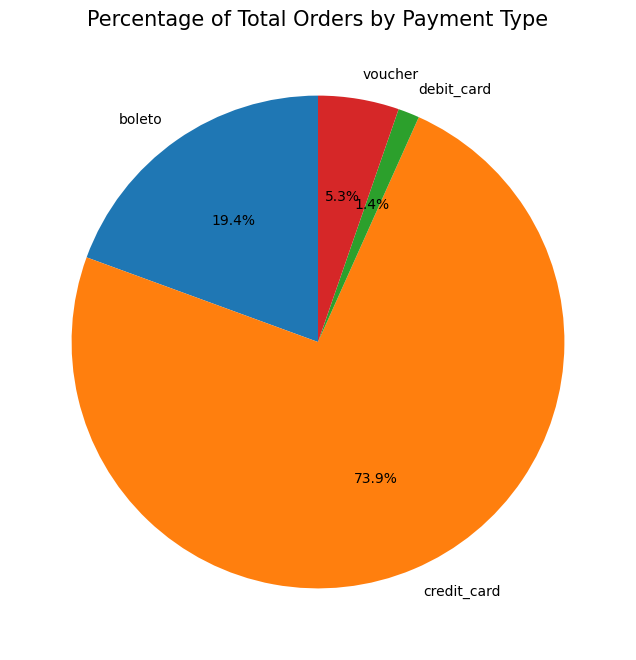

In [227]:
plt.figure(figsize=(8, 8))
plt.pie(bypayment_df['percentage'], labels=bypayment_df['payment_type'], autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title("Percentage of Total Orders by Payment Type", fontsize=15)
plt.show()

berdasarkan pie chart diatas dapat dilihat bahwa credit card adalah tipe transaksi yang paling sering digunakan dan digunankan untuk transaksi yang bernilai besar dibandingkan tipe transaksi lain.

## Conclusion



1. **Produk mana yang paling banyak dan paling sedikit terjual?**

> * Produk yang banyak terjual adalah produk bed bath table. Kontras dengan hal tersebut, produk Security and Services merupakan produk yang paling sedikit terjual.

2. **Bagaimana demografi pelanggan? Lokasi geografis mana yang yang memiliki pelanggan terbanyak?**

> * 42% pelanggan berasal dari state Sao Paulo yang diikuti oleh Rio De Janeiro sebesar 12.8%


3. **Bagaimana performa penjualan perusahaan? dan kapan penjualan mengalami peningkatan tertinggi?**


> * Peningkatan jumlah order yang sangat signifikan terjadi pada bulan November 2017. Dapat dilihat bahwa trend penjualan cenderung positif walaupun sempat terjadi penurunan, dan penurunan terbesar terjadi pada Desember 2017.


4. **Barang apa yang memiliki rata-rata review score paling tinggi?**


> * Barang yang mendapatkan rata-rata review score paling tinggi adalah barang dengan kategori agro industry and commerce. Dilain sisi, Security and Services mendapatkan review score paling rendah





